¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Introduccion

Los clientes de Beta Bank estan dejando cancelando sus cuentas bancarias mes a mes, los banqueros prefieren salvar a sus clientes actuales que atraer nuevos, realizaremos un modelo que los ayude a conocer mejor a sus clientes con un margen de efectivdad cercano al 60%.




# Objetivos

- Importar las librerias necesarias para nuestro proyecto
- Generar modelos de sin tener en cuenta el desequilibrio en las caracterisitcas
- Mejorar la calidad del modelo con diferentes modifcaciones en sus parametros

## Importamos las librerias necesarias

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate

## Leemos el dataset

In [2]:
# Leemos el dataset
data = pd.read_csv('/datasets/Churn.csv')

## Identificamos valores nulos

In [3]:
# Analisis preeliminar de los datos
data.info()
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    156

Nuestro dataset cuenta con cerca de 900 valores nulos en la columna 'Tenure', procederemos a corregir utilizando la mediana.

## Corregimos valores nulos

In [4]:
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
print(data.isnull().sum())
data['Exited'].mean()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


0.2037

Los valores nulos fueron corregidos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo en la preparación inicial de los datos! Eliminar los duplicados, cambiar el nombre de las columnas a un formato adecuado para el código y manejar los valores ausentes es muy importante tanto para tener un código ordenado y legible como para evitar sesgos durante el entrenamiento del modelo debido a datos faltantes. Tu propuesta de llenar los faltantes con la mediana es muy buena debido a que este estadístico es menos sensible a los outliers que la media.
</div>

## Categorizacion y estandarizacion

In [5]:
# Creamos una instancia de clase
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
print(features_train.shape)

(7500, 2944)


/tmp/ipykernel_31/3417519993.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/3417519993.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Eliminar las variables que no tienen relación con la variable target es muy importante para no aumentar los tiempos de entrenamiento ni de predicción, además codificaste los datos a OHE para poder utiliar modelos que no pueden manejar las variables categóricas en Ordinal Encoding sin imponer una relación lineal entre los valores. Dividir los datos en 3 conjuntos en vez de 2 tembién es muy importante ya que el conjunto de validación puede ser muy útil para el ajuste de los hiperparámetros y el escalado de los datos es el óptimo para evitar que variables con una escala mayor tengan un efecto mayor artificial sobre quellas con una dimensión menor.
</div>

## Exactitud para el arbol de decision

In [6]:
#Entrenamos el modelo
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(accuracy_valid)

0.8152


In [7]:
matrix = confusion_matrix(target_valid,predicted_valid)
print(matrix)

[[1783  182]
 [ 280  255]]


In [8]:
print(recall_score(target_valid, predicted_valid))

0.4766355140186916


In [9]:
print(precision_score(target_valid, predicted_valid))

0.5835240274599542


In [10]:
f1 = f1_score(target_valid, model.predict(features_valid))
print (f1)

0.5246913580246914


En general el modelo tiene margen de mejora, ya que nuestro valor de f1 fue del 0.52, lo cual indica que tiene un margen de aceptacion moderado, teniendo en cuenta los valores arrojados por la matrix, se estan analizando mas los grupos de la clase 0, la mayoritaria, y hay un gran margen de error con la clase 1, la minoritaria.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, entrenaste de forma adecuada los modelos. Solamente te recomiendo desarrollar otro modelo (bosque aleatorio) y  ajustastar con los hiperparámetros a la opción más óptima dada la restricción de no tomar en cuenta el desequilibrio de clases. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Ramdom forest

In [ ]:
# Definir el modelo
model_rf = RandomForestClassifier(random_state=12345)

# Ajustar el modelo
model_rf.fit(features_upsampled, target_upsampled)

In [20]:

# Obtener las probabilidades de predicción
probabilities = model_rf.predict_proba(features_valid)[:, 1]

# Calcular la curva de precisión y recall
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities)

# Encontrar el umbral que maximiza el F1 Score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

# Aplicar el mejor umbral
predicted_valid_adjusted = (probabilities >= best_threshold).astype(int)

# Evaluar el modelo con el umbral ajustado
print('F1 Score with adjusted threshold:', f1_score(target_valid, predicted_valid_adjusted))
print('Classification Report with adjusted threshold:\n', classification_report(target_valid, predicted_valid_adjusted))

F1 Score with adjusted threshold: 0.6228813559322035
Classification Report with adjusted threshold:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1573
           1       0.57      0.69      0.62       427

    accuracy                           0.82      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



## Ajuste de peso de clase

In [11]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5051020408163265


Ajustar los pesos no funciono, se desmojoro nuestro modelo, esto por la disminucion en el valor de f1

## Sobremuestreo

In [12]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345

)

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Replicar las instancias de la clase minoritaria
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# Aplicar sobremuestreo
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# Entrenar el modelo
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

# Hacer predicciones en el conjunto de validación
predicted_valid = model.predict(features_valid)

# Evaluar el modelo
print('F1 Score:', f1_score(target_valid, predicted_valid))
print('Classification Report:')
print(classification_report(target_valid, predicted_valid))



F1 Score: 0.49582637729549245
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1573
           1       0.39      0.70      0.50       427

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.72      2000



El resultado con el sobremuestreo es similar, no hay una mejoria en el modelo

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena función para realizar el sobremuestreo.
</div>

## Submuestreo

In [13]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

print(features_downsampled.shape)
print(target_downsampled.shape)
print()
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

(2249, 2944)
(2249,)

F1: 0.3518747424804285


El submuestro tampoco es la solucion, ya que hubo una desmejoria notable en nuestro modelo

## Ajuste del umbral

In [14]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(
        'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
            threshold, precision, recall
        )
    )

Threshold = 0.00 | Precision = 0.213, Recall = 1.000
Threshold = 0.02 | Precision = 0.213, Recall = 1.000
Threshold = 0.04 | Precision = 0.213, Recall = 1.000
Threshold = 0.06 | Precision = 0.213, Recall = 1.000
Threshold = 0.08 | Precision = 0.213, Recall = 1.000
Threshold = 0.10 | Precision = 0.213, Recall = 1.000
Threshold = 0.12 | Precision = 0.213, Recall = 1.000
Threshold = 0.14 | Precision = 0.223, Recall = 0.956
Threshold = 0.16 | Precision = 0.252, Recall = 0.763
Threshold = 0.18 | Precision = 0.251, Recall = 0.747
Threshold = 0.20 | Precision = 0.253, Recall = 0.686
Threshold = 0.22 | Precision = 0.251, Recall = 0.522
Threshold = 0.24 | Precision = 0.236, Recall = 0.274
Threshold = 0.26 | Precision = 0.259, Recall = 0.119
Threshold = 0.28 | Precision = 0.311, Recall = 0.044


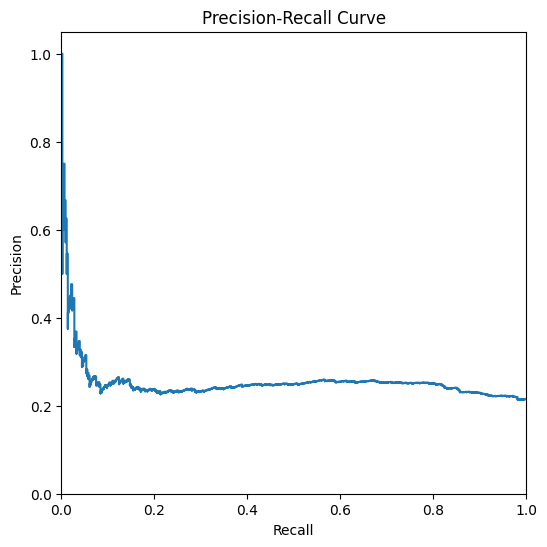

In [15]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

El ajuste del umbral indica que el modelo no va a mejorar mas con valores que superen entre el 2.0 y el 2.5 de margen.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo tanto con el sobremuestreo y el submuestreo. Las funciones utilizadas para obtener el dataframe requerido para ambas técnicas fueron correctas y los resultados obtenidos son óptimos dado el ajuste de hiperparámetros y la preparación de datos excelente que realizaste. Además tu presentación de resultados es muy intuitiva y tus conclusiones cumplen con el objetivo de la empresa del ejercicio.
</div>

In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < escribe el código aquí >
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.5733774422299012


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente comparación con otro modelo como el random forest
</div>

## Conclusion

Se aplicaron multiples modelos para intentar el F1 inicial, pero ninguno daba mejoras, todos mostraron decrecimiento, los metodos de sobremuestreo y ajustes de clases decrecieron cerca del 0.1 los indices de f1, se aplico el metodo para mejorar el umbral pero no mostraba una mejora significativa, comparado con los umb

<div class="alert alert-block alert-success">
<b>Resumen de la revisión</b> <a class="tocSkip"></a>

Es un muy buen trabajo. Cumples tanto con el objetivo del F1 y con satisfacer las necesidades de la empresa del ejercicio. La preparación de los datos toma en cuenta todas las características con las que debe cumplir un conjunto de datos óptimo para el entrenamiento de los modelos y la implementación de estos últimos fue muy buena ya que consideraste 3 técnicas distintas para solucionar el desequilibrio de clases que encontraste en la exploración de los datos. Sigue con el excelente trabajo! 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>